In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import csv

def get_time_power_mov_avg(filename):
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        power_value = []
        time_index = []
        first_row = True
        for row in csvreader:
            if first_row:
                first_time = float(row[0]);
                first_row = False
            time_index.append(float(row[0])-first_time)
            power_value.append(float(row[1]))
        
        window_size=100
        moving_averages = []
        for i in range(len(power_value) - window_size + 1):
            window = power_value[i:i+window_size]
            avg = np.mean(window)
            moving_averages.append(avg)
        

    moving_averages = [0]*(window_size-1) + moving_averages;

    return time_index,power_value,moving_averages


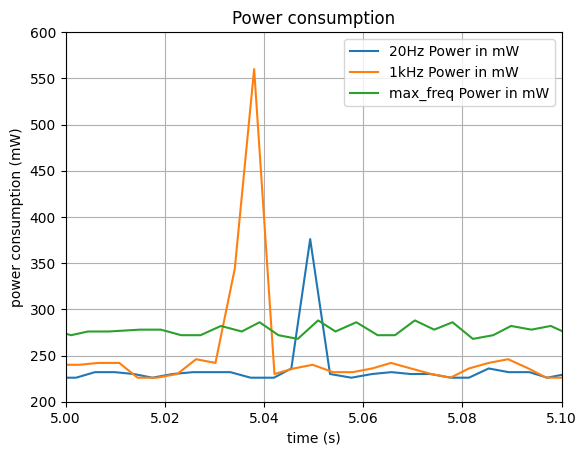

In [9]:
#values for 20Hz sampling
time_index_20,power_value_20,moving_averages_20 = get_time_power_mov_avg('./energy_measurements/20Hz_sampling.csv')
#values for 1kHz sampling
time_index_1k,power_value_1k,moving_averages_1k = get_time_power_mov_avg('./energy_measurements/1KHz_sampling.csv')
#values for max sampling
time_index_max,power_value_max,moving_averages_max = get_time_power_mov_avg('./energy_measurements/maximum_sampling.csv')
# values for 20Hz no wifi usage
time_index_20_n,power_value_20_n,moving_averages_20_n = get_time_power_mov_avg('./energy_measurements/20Hz_no_wifi.csv')



plt.plot(time_index_20,power_value_20, label="20Hz Power in mW")
plt.plot(time_index_1k,power_value_1k, label="1kHz Power in mW")
plt.plot(time_index_max,power_value_max, label="max_freq Power in mW")
#plt.plot(time_index,moving_averages, label="moving average mW")
plt.legend()
plt.xlabel('time (s)')
plt.xlim(5,5.1)
plt.ylim(200,600)
plt.ylabel('power consumption (mW)')
plt.title('Power consumption')
plt.grid(True)





plt.show()

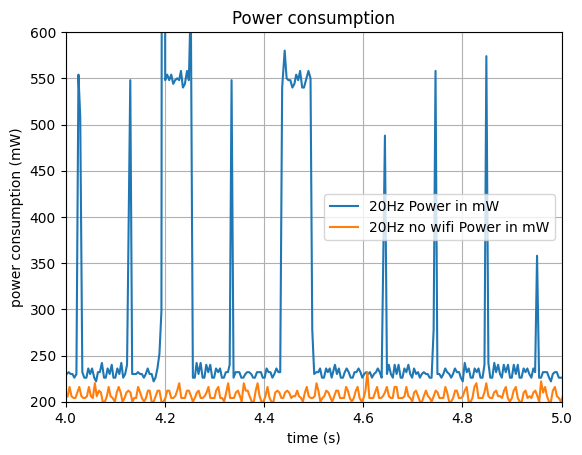

In [10]:
plt.plot(time_index_20,power_value_20, label="20Hz Power in mW")
plt.plot(time_index_20_n,power_value_20_n, label="20Hz no wifi Power in mW")

plt.legend()
plt.xlabel('time (s)')
plt.xlim(4,5)
plt.ylim(200,600)
plt.ylabel('power consumption (mW)')
plt.title('Power consumption')
plt.grid(True)


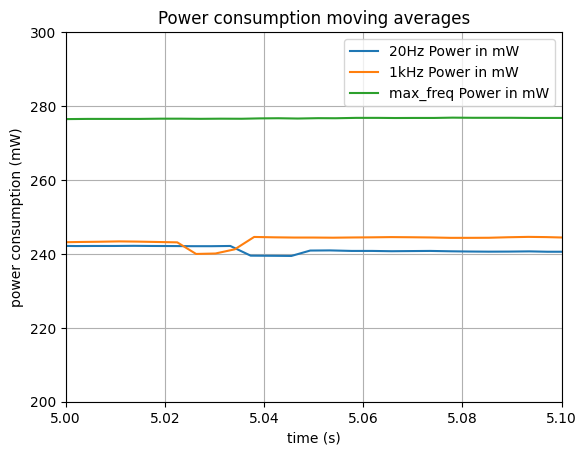

In [4]:
plt.plot(time_index_20,moving_averages_20, label="20Hz Power in mW")
plt.plot(time_index_1k,moving_averages_1k, label="1kHz Power in mW")
plt.plot(time_index_max,moving_averages_max, label="max_freq Power in mW")
#plt.plot(time_index,moving_averages, label="moving average mW")
plt.legend()
plt.xlabel('time (s)')

plt.ylabel('power consumption (mW)')
plt.xlim(5,5.1)
plt.ylim(200,300)
plt.title('Power consumption moving averages')
plt.grid(True)

plt.show()


In [19]:
print("Mean power consumption of 20Hz Sampling (with transmission):",np.mean(power_value_20),"mW")
print("Mean power consumption of 1kHz Sampling (with transmission):",np.mean(power_value_1k), "mw")
print("Mean power consumption of Max frequency Sampling (without transmission):",np.mean(power_value_max), "mW")
print("Mean power consumption of 20Hz Sampling (without transmission):",np.mean(power_value_20_n),"mW")
print("Mean power used by wifi sending a packet every 5 seconds is: ",(np.mean(power_value_20)-np.mean(power_value_20_n)),"mW")


Mean power consumption of 20Hz Sampling (with transmission): 262.8284 mW
Mean power consumption of 1kHz Sampling (with transmission): 265.9056 mw
Mean power consumption of Max frequency Sampling (without transmission): 276.7808 mW
Mean power consumption of 20Hz Sampling (without transmission): 207.3124 mW
Mean power used by wifi sending a packet every 5 seconds is:  55.51599999999999 mW
